In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

from tensorflow import keras
import tensorflow as tf
import matplotlib.pyplot as plt

### Helper function to plot metric

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()

In [3]:
def plot_lr(history):
    learning_rate = history.history['lr']
    epochs = range(1, len(learning_rate) + 1)
    plt.plot(epochs, learning_rate)
    plt.title('Learning rate')
    plt.xlabel('Epochs')
    plt.ylabel('Learning rate')
    plt.show()

In [4]:
def get_test_accuracy(model, x_test, y_test):
    test_loss, test_acc = model.evaluate(x=x_test, y=y_test, verbose=0)
    print('accuracy: {acc:0.3f}'.format(acc=test_acc))

## Fashion MMIST dataset

In [5]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [6]:
X_train_full.shape

(60000, 28, 28)

In [7]:
X_train_full.dtype

dtype('uint8')

In [8]:
# For faster training, let's use a subset 10,000
X_train, y_train = X_train_full[:10000] / 255.0, y_train_full[:10000]

## Building a NN model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

def create_model(): 
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(300, activation='relu'),
        Dense(100, activation='relu'),
        Dense(10, activation='softmax'),
    ])
    model.compile(
        optimizer='sgd', 
        loss='sparse_categorical_crossentropy', 
        metrics=['accuracy']
    )
    return model

In [11]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


## ReduceLROnPlateau

In [12]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

In [13]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', 
    factor=0.2,   
    patience=2, 
    min_lr=0.001,
    verbose=2
)

In [14]:
# Create a new model
model = create_model()

In [15]:
history_reduce_lr = model.fit(
    X_train, 
    y_train, 
    epochs=50, 
    validation_split=0.20, 
    batch_size=64, 
    verbose=2,
    callbacks=[reduce_lr]
)

Epoch 1/50
125/125 - 1s - loss: 1.4488 - accuracy: 0.5681 - val_loss: 1.0697 - val_accuracy: 0.6460
Epoch 2/50
125/125 - 0s - loss: 0.9197 - accuracy: 0.6942 - val_loss: 0.8501 - val_accuracy: 0.7055
Epoch 3/50
125/125 - 0s - loss: 0.7767 - accuracy: 0.7425 - val_loss: 0.7576 - val_accuracy: 0.7425
Epoch 4/50
125/125 - 0s - loss: 0.7014 - accuracy: 0.7656 - val_loss: 0.7048 - val_accuracy: 0.7595
Epoch 5/50
125/125 - 0s - loss: 0.6536 - accuracy: 0.7849 - val_loss: 0.6624 - val_accuracy: 0.7730
Epoch 6/50
125/125 - 0s - loss: 0.6162 - accuracy: 0.7946 - val_loss: 0.6319 - val_accuracy: 0.7875
Epoch 7/50
125/125 - 0s - loss: 0.5882 - accuracy: 0.8029 - val_loss: 0.6058 - val_accuracy: 0.7950
Epoch 8/50
125/125 - 0s - loss: 0.5665 - accuracy: 0.8100 - val_loss: 0.5886 - val_accuracy: 0.7955
Epoch 9/50
125/125 - 0s - loss: 0.5439 - accuracy: 0.8175 - val_loss: 0.5702 - val_accuracy: 0.7995
Epoch 10/50
125/125 - 0s - loss: 0.5304 - accuracy: 0.8191 - val_loss: 0.5604 - val_accuracy: 0.8035

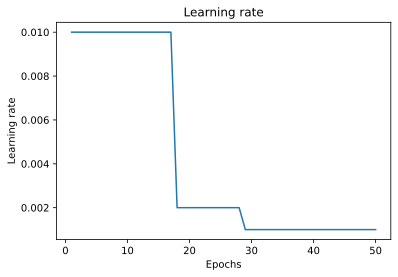

In [16]:
plot_lr(history_reduce_lr)

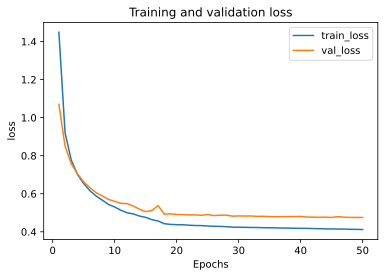

In [17]:
plot_metric(history_reduce_lr, 'loss')